# DATA 620 - Week 3

The task this week is to 
1.  Load a graph of your choosing from a text file or other source into a graph database or NetworkX.
2.  Create basic analysis on the graph, including the graph’s diameter, and at least one other metric of your choosing.
3.  Use a visualization tool of your choice ( NetworkX, Neo4j, Gephi, etc.) to display information.
4.  Record a short video (~ 5 minutes), and submit a link to the video in advance of our meet-up.


For this task I've chosen to work with a subset of the latest movielense data.

First, we'll set do some setup:

In [ ]:
import pandas as pd
import networkx as nx
import matplotlib.pyplot as plt

path = 'C:/Users/Paul/OneDrive - CUNY School of Professional Studies/CUNY/DATA 620/Week3/ml-latest-small/'
numRows = 20  #the number of rows we'll work with. 

Next, we'll do a bit of data wangling.  I was read a little bit about (Adjacency Lists)[https://networkx.github.io/documentation/networkx-1.10/reference/readwrite.adjlist.html] and I figured that it could be a usefule way to work in this class (particularly to facilitate data-sharing in the HW team context) so I figured that I would start there.

In the Movielense data, the "movies.csv" file 

In [129]:
#first we load and subset the data
movies = pd.read_csv(path+'movies.csv')
movies = movies.head(numRows)

#create the adjacency list
movies["adjList"] = movies["title"].astype(str)+'|'+movies["genres"]
adjList = movies.adjList

adjList.to_csv(path+'adj.csv',index=False)

print(movies["adjList"].head(5))

0    Toy Story (1995)|Adventure|Animation|Children|...
1            Jumanji (1995)|Adventure|Children|Fantasy
2               Grumpier Old Men (1995)|Comedy|Romance
3        Waiting to Exhale (1995)|Comedy|Drama|Romance
4            Father of the Bride Part II (1995)|Comedy
Name: adjList, dtype: object


In [131]:
#print(movies.title.values)

print(type(adjList[0]))
print(adjList[0])

G=nx.read_adjlist(path+'adj.csv',delimiter='|')


#check nodes and edges
print("Printing Nodes:")
for i,node in enumerate(G.nodes()):
    print(i,node)
print("\n")
    
print("Printing Edges:")
for i,edge in enumerate(G.edges()):
    print(i,edge)


<class 'str'>
Toy Story (1995)|Adventure|Animation|Children|Comedy|Fantasy
Printing Nodes:
0 Toy Story (1995)
1 Adventure
2 Animation
3 Children
4 Comedy
5 Fantasy
6 Jumanji (1995)
7 Grumpier Old Men (1995)
8 Romance
9 Waiting to Exhale (1995)
10 Drama
11 Father of the Bride Part II (1995)
12 Heat (1995)
13 Action
14 Crime
15 Thriller
16 Sabrina (1995)
17 Tom and Huck (1995)
18 Sudden Death (1995)
19 GoldenEye (1995)
20 "American President, The (1995)
21 Romance"
22 Dracula: Dead and Loving It (1995)
23 Horror
24 Balto (1995)
25 Nixon (1995)
26 Cutthroat Island (1995)
27 Casino (1995)
28 Sense and Sensibility (1995)
29 Four Rooms (1995)
30 Ace Ventura: When Nature Calls (1995)
31 Money Train (1995)


Printing Edges:
0 ('Toy Story (1995)', 'Adventure')
1 ('Toy Story (1995)', 'Animation')
2 ('Toy Story (1995)', 'Children')
3 ('Toy Story (1995)', 'Comedy')
4 ('Toy Story (1995)', 'Fantasy')
5 ('Adventure', 'Jumanji (1995)')
6 ('Adventure', 'Tom and Huck (1995)')
7 ('Adventure', 'GoldenEye 

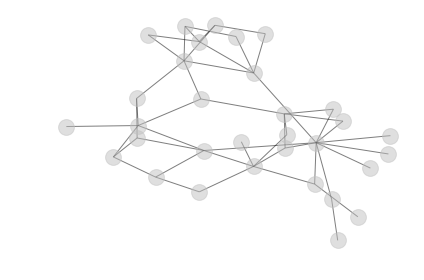

In [132]:
#draw and show the graph

#nx.draw_networkx_nodes(G,node_size=800, node_color='silver')
#nx.draw_networkx_edges(G,alpha=0.5,width=5,edge_color='m')
#nx.draw_networkx_labels(G,font_size=10,font_weight="bold")

nx.draw_networkx(G,with_labels=False,node_size=250,node_color='silver',alpha=0.5)


#fix the margins
plt.tight_layout()

#turn off the axis
plt.axis('off')

#display the graph
plt.show()

In [134]:
d = nx.diameter(G)
print(d)

6
